In [1]:
# Imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_data_1 = pd.read_csv('/content/drive/MyDrive/MachineLearning/Report/training1.csv')
train_data_2 = pd.read_csv('/content/drive/MyDrive/MachineLearning/Report/training2.csv')
test_data = pd.read_csv('/content/drive/MyDrive/MachineLearning/Report/test.csv')

print(f'Train data shape: {train_data_1.shape, train_data_2.shape}')
print(f'Test data shape: {test_data.shape}')

Mounted at /content/drive
Train data shape: ((600, 4610), (2800, 4610))
Test data shape: (2000, 4608)


In [3]:
# Combine training datasets
train_data = pd.concat([train_data_1, train_data_2])
train_data.shape

(3400, 4610)

In [4]:
train_data.head()

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,label,confidence
0,0.96629,0.00000,0.000000,0.184890,1.3535,0.00000,0.66736,0.00000,0.30246,0.00000,...,0.025722,0.029769,0.022448,0.018352,0.059976,0.018121,0.034956,0.018626,0.0,1.00
1,0.42980,0.00000,0.142340,0.000000,0.0000,0.00000,0.00000,0.83749,0.00000,0.00000,...,0.053810,0.030060,0.036972,0.039459,0.025726,0.015295,0.032943,0.015002,1.0,0.66
2,0.00000,0.00000,0.000000,0.968570,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.042560,0.045289,0.047827,0.039196,0.046091,0.020280,0.048154,0.030391,1.0,1.00
3,0.00000,0.13278,0.032179,0.742990,0.0000,0.67521,0.00000,0.18638,1.06300,0.74294,...,0.040872,0.035247,0.033755,0.049919,0.058322,0.027145,0.018040,0.030181,1.0,1.00
4,0.00000,0.12242,0.627020,0.017635,0.0000,0.00000,0.28884,1.10050,0.00000,0.15511,...,0.025219,0.005606,0.024671,0.025305,0.025466,0.023212,0.011266,0.035695,0.0,0.66


In [5]:
test_data.head()

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511
0,0.787990,NaN,2.0246,0.00000,0.00000,3.29550,0.00000,0.12965,0.00000,NaN,...,NaN,0.034861,0.045078,NaN,NaN,0.031250,0.026715,0.007441,0.028426,NaN
1,0.000000,0.72265,NaN,0.15856,NaN,NaN,0.00000,0.00000,NaN,0.0,...,0.004348,0.007177,0.014610,NaN,0.007715,0.014736,0.009790,0.036324,NaN,NaN
2,0.000000,NaN,0.0000,0.00000,0.64827,0.48099,0.00000,0.71721,0.70541,0.0,...,0.026724,0.027204,0.021123,0.027027,0.029328,0.031330,NaN,0.013995,0.033780,0.013178
3,0.044644,0.00000,NaN,0.71294,0.00000,NaN,NaN,0.00000,0.00000,0.0,...,0.026242,0.029739,0.025212,NaN,0.021912,0.020740,0.024278,0.001928,0.015194,0.023487
4,0.848170,NaN,0.0000,NaN,0.00000,0.00000,0.25626,0.00000,0.79886,0.0,...,0.003493,0.002661,NaN,0.069194,0.040851,0.006043,NaN,0.035340,0.024834,0.076113


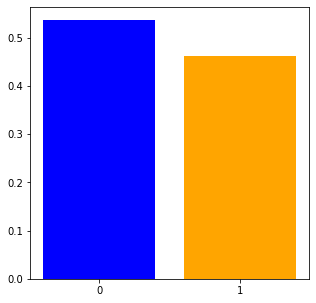

In [6]:
plt.rcParams['figure.figsize'] = [5, 5]

# Check class balance
balance = train_data['label'].value_counts()/len(train_data)
plt.xticks(np.arange(0,2))
plt.bar(x=[0,1], height=balance.values, color=['blue', 'orange'])
plt.show()

# Pre-processing

## Imputation

In [7]:
# Print the number of missing values
train_data.isna().sum()

CNNs          545
CNNs.1        583
CNNs.2        584
CNNs.3        528
CNNs.4        556
             ... 
GIST.509      540
GIST.510      556
GIST.511      568
label           0
confidence      0
Length: 4610, dtype: int64

In [8]:
# Remove feature if it has more than 20% of missing values
train_data = train_data.dropna(thresh=train_data.shape[0]*0.80, axis=1)
train_data.shape

(3400, 4610)

In [9]:
# Impute missing values with column means
train_data = train_data.fillna(value=train_data.mean())

# Check if any column has missing values
num_nan = train_data.isna().sum().values
len(num_nan[num_nan != 0])

0

## Standartization

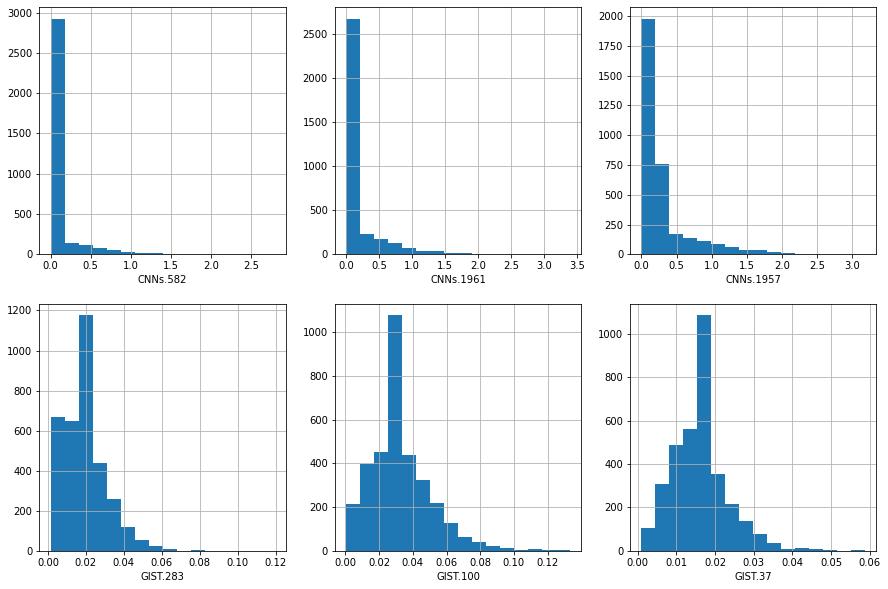

In [10]:
# Visualise distributions of 6 random features
cols_1 = train_data.iloc[:,:-514].sample(n=3,axis='columns', random_state=0) # Take 3 CNN features
cols_2 = train_data.iloc[:,-514:].sample(n=3,axis='columns', random_state=0) # And 3 gist features
cols = pd.concat([cols_1, cols_2], axis=1)

plt.rcParams['figure.figsize'] = [15, 10]
for i, col in enumerate(cols):
    plt.subplot(2,3,i+1)
    ax = cols[col].hist(bins=16)
    ax.set_xlabel(col)

plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

# Scale values to have a mean of 0 and std of 1
std_scaler = StandardScaler()
train_data_norm = std_scaler.fit_transform(train_data)
train_data_norm = pd.DataFrame(train_data_norm, index=train_data.index, columns=train_data.columns) # convert back to DataFrame
train_data_norm.shape

(3400, 4610)

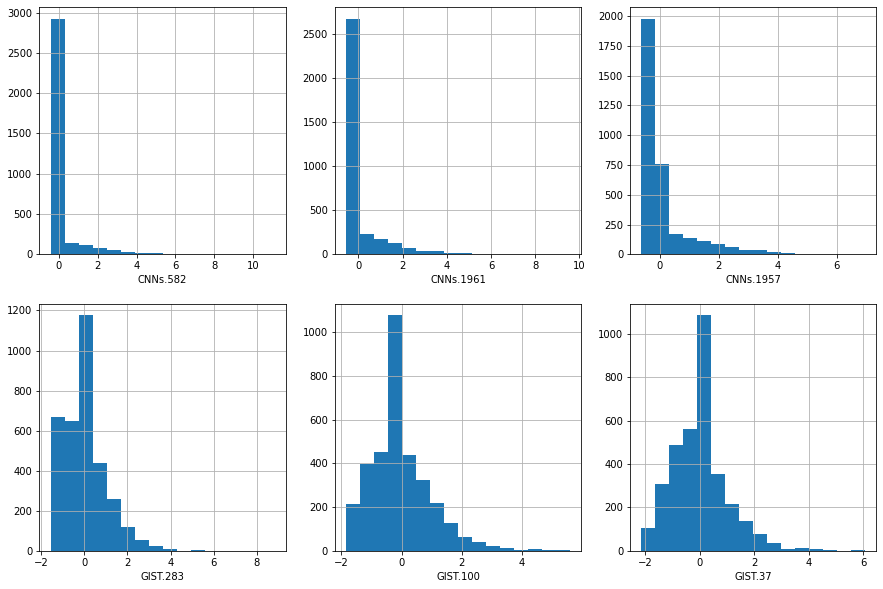

In [12]:
# Plot the distributions again to see what has changed
cols_1 = train_data_norm.iloc[:,:-514].sample(n=3,axis='columns', random_state=0) # Take 3 CNN features
cols_2 = train_data_norm.iloc[:,-514:-2].sample(n=3,axis='columns', random_state=0) # And 3 gist features
cols = pd.concat([cols_1, cols_2], axis=1)

plt.rcParams['figure.figsize'] = [15, 10]
for i, col in enumerate(cols):
    plt.subplot(2,3,i+1)
    ax = cols[col].hist(bins=16)
    ax.set_xlabel(col)

plt.savefig("hists.png", bbox_inches = 'tight')
plt.show()

## Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler 

# Translate features to range 0-1
minmax_scaler = MinMaxScaler()
train_data_norm = minmax_scaler.fit_transform(train_data_norm)
train_data_norm = pd.DataFrame(train_data_norm, index=train_data.index, columns=train_data.columns) # convert back to DataFrame
train_data_norm.shape

(3400, 4610)

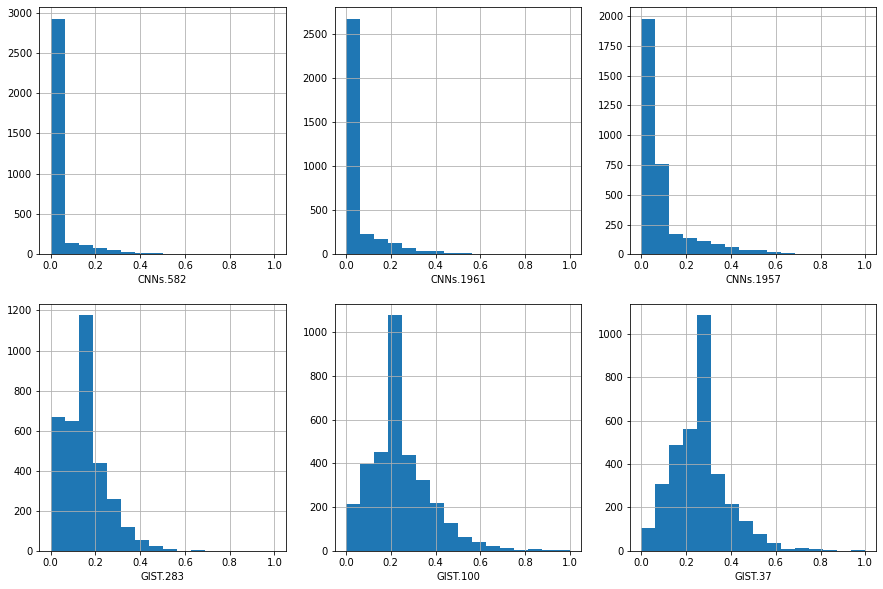

In [14]:
# Plot the distributions again to see what has changed
cols_1 = train_data_norm.iloc[:,:-514].sample(n=3,axis='columns', random_state=0) # Take 3 CNN features
cols_2 = train_data_norm.iloc[:,-514:-2].sample(n=3,axis='columns', random_state=0) # And 3 gist features
cols = pd.concat([cols_1, cols_2], axis=1)

plt.rcParams['figure.figsize'] = [15, 10]
for i, col in enumerate(cols):
    plt.subplot(2,3,i+1)
    ax = cols[col].hist(bins=16)
    ax.set_xlabel(col)

plt.savefig("hists.png", bbox_inches = 'tight')
plt.show()

# Model Selection

In [15]:
# Separate features from class labels
data = train_data.drop(['label','confidence'], axis=1)
classes = train_data['label']
confidences = train_data['confidence']

In [16]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [17]:
# Define classifiers
classifiers = { 
    'svm_rbf': Pipeline([('std_scaler', std_scaler), 
                         ('minmax_scaler', minmax_scaler), 
                         ('clf', SVC(C=1.0, kernel='rbf'))]),
               
    'svm_linear': Pipeline([('std_scaler', std_scaler), 
                            ('minmax_scaler', minmax_scaler), 
                            ('clf', SVC(C=0.01, kernel='linear'))]),           
    }

## Choosing Dimensionality Reduction Method

Use Anova to select most important features:

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_validate

def do_feature_selection(clf, X, y, num_feats, label, include_plot=True):
    '''
    Perform Anova feature selection
    :param clf: pipeline object with an estimator at the end
    :X: dataset of observations
    :y: corresponding class labels
    :num_feats: list of numbers corresponding to the amount of features to be tried
    :include_plot: True if the figure should be drawn after selection
    :return: a dict where each key is the number of features and corresponding value is the list of selected features
    '''
    results = {}
    acc = []

    # Add anova as a first step of a pipeline
    clf.steps.insert(0,['anova', SelectKBest(f_classif)])

    for i in num_feats:
        # Set the number of features for anova
        clf.set_params(anova__k=i)

        # Cross-validate
        cv = cross_validate(clf, X, y, cv=5, return_estimator=True)
        scores = cv['test_score'] # get the scores for validation data
        estimators = cv['estimator'] # get the classifiers used during cross validation

        # Save selected feature indexes
        feats = estimators[0].steps[0][1].get_support(indices=True) 
        results[i] = feats 
        acc.append(np.mean(scores))

    # Remove anova from the pipeline
    clf.steps.pop(0)

    # Plot the accuracy
    if include_plot:
        plt.plot(num_features, acc, label=label)
        plt.legend(loc='lower right')
    
    return results

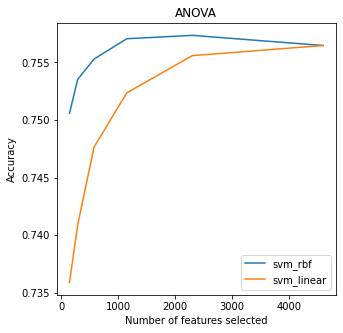

In [19]:
# Number of features for anova to be tried
num_features = [144, 288, 576, 1152, 2304, 4608]

plt.rcParams['figure.figsize'] = [5, 5]
plt.title('ANOVA')
plt.xlabel('Number of features selected')
plt.ylabel('Accuracy')

clf_results_anova = {}
for label, clf in classifiers.items():
    feats = do_feature_selection(clf, data, classes, num_features, label)
    clf_results_anova[label] = feats

plt.savefig("anova.png", bbox_inches = 'tight')
plt.show()

Use PCA to project features on a smaller number of dimensions:

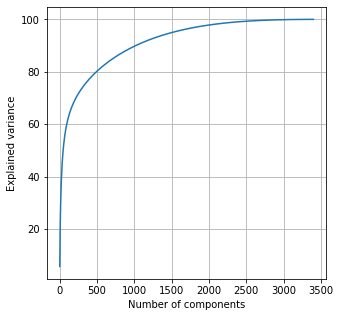

99.99999999999966


In [21]:
from sklearn.decomposition import PCA

pca_2000 = PCA(n_components=min(data.shape))
pca_2000.fit(data)

# Visualize the amount of explained variance
plt.plot(np.cumsum(pca_2000.explained_variance_ratio_ * 100))
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

# Print the amount of explained variance  
print(np.cumsum(pca_2000.explained_variance_ratio_ * 100)[-1])

In [40]:
# Do PCA for dimensionality reduction
def do_pca(clf, X, y, num_components, label, include_plot=True):

    results = []

    # Add PCA as a third step of a pipeline
    clf.steps.insert(2,['pca', PCA()])

    for i in num_components:
        # Set the number of features for PCA to 'i'
        clf.set_params(pca__n_components=i)
        
        # Cross-validate and get the accuracy
        cv = cross_validate(clf, X, y, cv=5)
        scores = cv['test_score']
        acc = np.mean(scores)
        results.append(acc)
    
    # Remove from the pipeline
    clf.steps.pop(0)

    # Show the results
    if include_plot:
        plt.plot(num_components, results, label=label)
        plt.legend(loc='upper right')

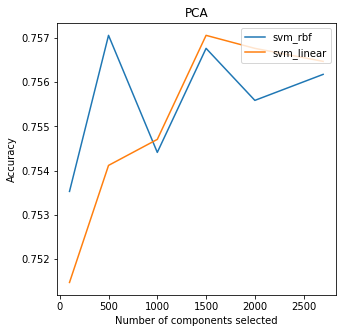

In [41]:
# Number of components for pca to be tried
num_components = [100, 500, 1000, 1500, 2000, 2700]

plt.title('PCA')
plt.xlabel('Number of components selected')
plt.ylabel('Accuracy')

for label, clf in classifiers.items():
    do_pca(clf, data, classes, num_components, label)

plt.savefig("pca.png", bbox_inches = 'tight')
plt.show()

## Hyperparameter Tuning

In [26]:
# Select chosen number of features from the dataset
feat_idx = clf_results_anova['svm_rbf'][2304]
data_reduced_feats = data.iloc[:,feat_idx]
data_reduced_feats.shape

(3400, 2304)

In [33]:
from sklearn.model_selection import GridSearchCV

# Create an instance of a classifier 
clf = Pipeline([('std_scaler', std_scaler), 
                ('minmax_scaler', minmax_scaler), 
                ('clf', SVC())])

# Create a grid of hyperparameters to be tried
svm_param_grid = {'clf__C': [0.01, 0.1, 1, 10],
                  'clf__gamma': ['scale', 0.001, 0.01, 0.1],
                  'clf__kernel': ['rbf']}  

# Find the optimal parameters using 5-fold cv
grid_search = GridSearchCV(clf, svm_param_grid, scoring='accuracy', cv=5)
search = grid_search.fit(data_reduced_feats, classes) 
print('best score: {}, parameters: {}'.format(search.best_score_, search.best_params_))

best score: 0.76, parameters: {'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


In [35]:
# Apply confidence scores to see how performance changes when some observations are assigned higher weights
grid_search_conf = GridSearchCV(clf, svm_param_grid, scoring='accuracy', cv=5)
kwargs = {clf.steps[-1][0] + '__sample_weight': confidences*2} # add confidences as sample weight parameter for the SVM
search_conf = grid_search_conf.fit(data_reduced_feats, classes, **kwargs) 
print('best score: {}, parameters: {}'.format(search_conf.best_score_, search_conf.best_params_))

best score: 0.7602941176470588, parameters: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}


# Evaluation

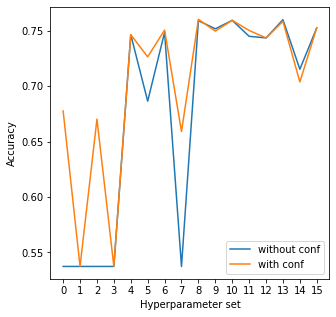

In [39]:
# Show how validation accuracy changes for each combination of hyperparameters
scores = search.cv_results_['mean_test_score']

plt.xticks(np.arange(16))
plt.xlabel('Hyperparameter set')
plt.ylabel('Accuracy')
plt.plot(scores, label='without conf')

# Compare with resulting scores when confidences are used
scores_conf = search_conf.cv_results_['mean_test_score']
plt.plot(scores_conf, label='with conf')
plt.legend()

plt.savefig("hyperparams.png", bbox_inches = 'tight')
plt.show()

# Exporting Test Predictions

In [42]:
# Print the number of missing values
test_data.isna().sum()

CNNs        384
CNNs.1      414
CNNs.2      390
CNNs.3      423
CNNs.4      397
           ... 
GIST.507    399
GIST.508    437
GIST.509    379
GIST.510    399
GIST.511    375
Length: 4608, dtype: int64

In [43]:
# Impute missing values with column means
test_data = test_data.fillna(value=test_data.mean())

# Check if any column has missing values
num_nan = test_data.isna().sum().values
len(num_nan[num_nan != 0])

0

In [44]:
test_data.head()

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511
0,0.787990,0.307314,2.02460,0.000000,0.000000,3.295500,0.00000,0.12965,0.000000,0.165616,...,0.021705,0.034861,0.045078,0.034300,0.030645,0.031250,0.026715,0.007441,0.028426,0.024078
1,0.000000,0.722650,0.23718,0.158560,0.205002,0.235777,0.00000,0.00000,0.185367,0.000000,...,0.004348,0.007177,0.014610,0.034300,0.007715,0.014736,0.009790,0.036324,0.026978,0.024078
2,0.000000,0.307314,0.00000,0.000000,0.648270,0.480990,0.00000,0.71721,0.705410,0.000000,...,0.026724,0.027204,0.021123,0.027027,0.029328,0.031330,0.030306,0.013995,0.033780,0.013178
3,0.044644,0.000000,0.23718,0.712940,0.000000,0.235777,0.14967,0.00000,0.000000,0.000000,...,0.026242,0.029739,0.025212,0.034300,0.021912,0.020740,0.024278,0.001928,0.015194,0.023487
4,0.848170,0.307314,0.00000,0.304779,0.000000,0.000000,0.25626,0.00000,0.798860,0.000000,...,0.003493,0.002661,0.032333,0.069194,0.040851,0.006043,0.030306,0.035340,0.024834,0.076113


In [45]:
# Reduce the number of features in the testing dataset
feat_idx = clf_results_anova['svm_rbf'][2304]
test_data_reduced_feats = test_data.iloc[:,feat_idx]
test_data_reduced_feats.shape

(2000, 2304)

In [62]:
# Create an instance of a classifier 
clf = Pipeline([('std_scaler', std_scaler), 
                ('minmax_scaler', minmax_scaler), 
                ('clf', SVC())])

# Set optimal parameters
best_params = search_conf.best_params_
clf.set_params(**best_params)

# Add confidences as sample weight parameter for the classifier
kwargs = {clf.steps[-1][0] + '__sample_weight': confidences*2}

# Train the classifier
clf.fit(data_reduced_feats, classes, **kwargs)

# Predict class labels for the test dataset
predictions = clf.predict(test_data_reduced_feats)

# Export predictions
predictions = pd.DataFrame(predictions, columns=['label']) # convert to DataFrame
predictions.to_csv('predictions.csv', index=False)